In [2]:
import pandas as pd
import numpy as np
import tabula

# Generate cost data

In [3]:
input_path = '../input_static/level_of_service/'

## PT ticket prices
The German rail operator provides a distance-related ticket price list as pdf that can be translated into a function

In [4]:
input_file = input_path + 'DB_2020_preisliste_fahrplanjahr_2020.pdf'

In [23]:
# generate a DataFrame
db_prices = tabula.read_pdf(input_file, output_format='dataframe', pages=list(range(5, 41)), pandas_options={
    'names': ['km', 'single_trip_second_class', 'single_trip_first_class', 'return_trip_second_class', 'return_trip_first_class']
}, multiple_tables=False)[0]

In [25]:
db_prices.dropna(axis=0, how='any', inplace=True)

In [36]:
db_prices.dtypes

km                          float64
single_trip_second_class    float64
single_trip_first_class     float64
return_trip_second_class    float64
return_trip_first_class     float64
dtype: object

In [37]:
db_prices

,km,single_trip_second_class,single_trip_first_class,return_trip_second_class,return_trip_first_class
39,37.0,10.1,16.2,20.2,32.4
40,38.0,10.3,16.5,20.6,33.0
41,39.0,10.4,16.6,20.8,33.2
42,40.0,10.6,17.0,21.2,34.0
43,41.0,11.2,17.9,22.4,35.8
...,...,...,...,...,...
1970,1996.0,226.0,361.6,452.0,723.2
1971,1997.0,226.1,361.8,452.2,723.6
1972,1998.0,226.2,361.9,452.4,723.8
1973,1999.0,226.3,362.1,452.6,724.2


In [31]:
for col in list(db_prices.columns):
    db_prices[col] = db_prices[col].str.replace(',', '.')

In [35]:
db_prices = db_prices[[col for col in list(db_prices.columns)]].astype(float)

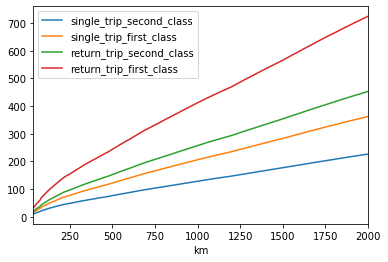

In [39]:
# plot
db_prices.set_index('km').plot()

In [40]:
# save
db_prices.to_csv(input_file.replace('.pdf', '.csv'), index=False)

In [ ]:
# Use second class single trip prices
# Choose a fit for a distance range up to 60 km (longer links are rare)
z = np.polyfit(c.loc[0:30, 'km'], c.loc[0:30, 'single_trip_second_class'], deg=1)
p = np.poly1d(z)
plt.plot(c.loc[0:30, 'km'], p(c.loc[0:30, 'km']), linestyle='--', marker=' ', label='Regression')
plt.plot(c.loc[0:30, 'km'], c.loc[0:30, 'single_trip_second_class'], linestyle='--', marker=' ', label='2nd class')
plt.legend()
rail_short_intercept = np.round(z[1], 3)
print('y={}*x+{}'.format(np.round(z[0], 3), rail_short_intercept))

## MIT cost
The German car driver association (ADAC) provides a list of cost for every new car available in Germany. They calculate aquisition cost, variable cost, fix cost, and repair cost.

In [41]:
input_file = input_path + 'ADAC_2019_autokostenuebersicht_47085.pdf'

In [127]:
# generate a DataFrame
cars = tabula.read_pdf(input_file, output_format='dataframe', pages=list(range(3, 38)), pandas_options={
    'names': ['model', 'data', 'costs']
}, multiple_tables=False)[0]

In [134]:
cars.sample(5)

,model,power,data,costs,fix_cost,repair_cost,var_cost,acquisition_cost,eur_per_month,ct_per_km
5,Giulia 2.0 Turbo 16V Business AT8,147 39500,NaN,145 93 153 446 837 67.0,145,93,153,446,837,67.0
6,Giulia 2.0 Turbo 16V Veloce Q4 AT8,206 52000,NaN,141 127 164 590 1022 81.8,141,127,164,590,1022,81.8
7,Giulia 2.2 Diesel Business AT8,118 39500,NaN,161 89 111 437 798 63.8,161,89,111,437,798,63.8
8,Giulia 2.2 Diesel Super AT8,140 42000,NaN,161 94 111 496 862 69.0,161,94,111,496,862,69.0
9,Giulia 2.2 Diesel Veloce Q4 AT8,154 52000,NaN,165 127 120 582 994 79.5,165,127,120,582,994,79.5
...,...,...,...,...,...,...,...,...,...,...
1820,T6.1 Caravelle 2.0 TDI BMT Trendline,110,47154,128 76 152 603 959 76.7,128,76,152,603,959,76.7
1821,T6.1 Caravelle 2.0 TDI BMT Trendline DSG,146,53943,146 95 162 684 1087 87.0,146,95,162,684,1087,87.0
1822,T6.1 Multivan 2.0 TDI BMT Family,81,36890,120 71 152 433 776 62.1,120,71,152,433,776,62.1
1823,T6.1 Multivan 2.0 TDI BMT Family,110,39419,140 76 154 450 820 65.6,140,76,154,450,820,65.6


In [129]:
# cleansing
cars.reset_index(inplace=True)
cars.rename(columns={'model': 'power', 'index': 'model'}, inplace=True)
cars.dropna(axis=0, how='all', inplace=True)
cars.dropna(axis=0, how='any', thresh=3, inplace=True)
cars = cars.loc[cars['model']!='NaN']
cars.dropna(axis=0, subset=['model'], inplace=True)
cars = cars.loc[cars['model']!='Marke / Modell:']

In [130]:
cars['costs'] = cars['costs'].str.replace(',', '.')
cars['costs'] = cars['costs'].str.replace('*', '')

In [133]:
elements = ['fix_cost', 'repair_cost', 'var_cost', 'acquisition_cost', 'eur_per_month', 'ct_per_km']
cars[elements] = cars['costs'].str.split(' ', expand=True)

In [136]:
# Save
elements.append('model')
cars = cars[elements]
cars.to_csv(input_file.replace('.pdf', '.csv'), index=False)

Take only perceived variable cost for distance-dependency.<br>
Assume monthly mileage of 15,000km / 12<br>
Additionally, there are fix cost which add up on every trip. Assume 3 trips per day as average.

In [ ]:
vc_car = cars['var_cost'].astype(int).mean() / (15000000/12) # in EUR/m
vc_car

In [ ]:
fix_car = cars['fix_cost'].astype(int).mean() / 30 / 3
fix_car